# Create linearly separable data sets,

In [1]:
from sklearn.datasets import make_blobs

n_samples = 1000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             cluster_std=1.4,
                             random_state=0)

# visualize the previously created data

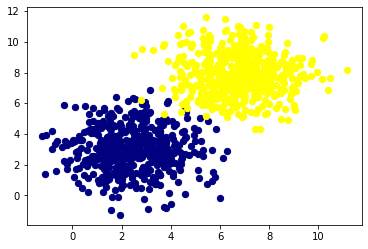

In [2]:
import matplotlib.pyplot as plt

colours = ('navy', 'yellow', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

# Split the data into training and testing

In [3]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.33, random_state=100)

# Plot training data set

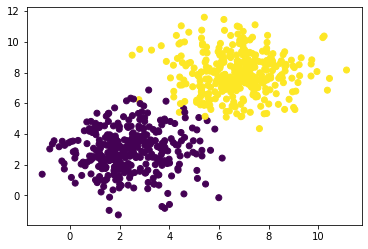

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o",c=y_train)

In [13]:
class Perceptron:
    
    def __init__(self, eta = 0.01, n_iter = 100):
        self.eta = eta
        self.n_iter = n_iter
        self.weight = []
        self.bias = 0
        self.error = []
        self.xi = []
        self.yi = []
    
    def train(self, X, y):
        dim = X.shape[1]
        self.weight = np.zeros(dim)
        self.bias = 1
        
        
        for _ in range(self.n_iter):
            
            m = 0
            for idx, x_i in enumerate(X):
                
                y_pred = self.transfer_function(self.weight.dot(x_i) + self.bias)
                
                m += (y[idx] - y_pred) ** 2
                self.weight = self.weight +  self.eta * (y[idx] - y_pred) * x_i
                self.bias = self.bias + self.eta * (y[idx] - y_pred)
                
            self.plot(X, y, self.weight, self.bias)
            self.error.append(m)
            
            #plt.show()
    
    def plot(self, X, y, weight, bias):
        
        
        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = (-weight[0] * x0_1 - bias) / weight[1]
        x1_2 = (-weight[0] * x0_2 - bias) / weight[1]
        
        self.xi.append([x0_1, x0_2])
        self.yi.append([x1_1, x1_2])
        
        
        
    def decision_boundary(self):
        
        return (self.xi,self.yi) 
        
    def predict(self, X):
        
        return self.transfer_function(np.dot(X, self.weight) + self.bias)
    
    def transfer_function(self, x):
        return np.where(x >= 0, 1, 0)

    def error_iteration_curve(self):
        
        fig = plt.figure(figsize=(20,9))
        plt.xlabel('Iteration no.')
        plt.ylabel('Error')
        plt.plot(self.error,color = 'tab:red')
        plt.show() 
    
         

In [6]:
def confusionmatrix(actual, predicted, normalize = False):
  unique = sorted(set(actual))
  matrix = [[0 for _ in unique] for _ in unique]
  imap   = {key: i for i, key in enumerate(unique)}
    # Generate Confusion Matrix
  for p, a in zip(predicted, actual):
    matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
  if normalize:
    sigma = sum([sum(matrix[imap[i]]) for i in unique])
    matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
  return matrix

In [8]:
def print_confusion_matrix(cm, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        cm, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
    #return fig

In [15]:
p = Perceptron()
p.train(X_train, y_train)

In [16]:
y_pred = p.predict(X_test)

In [17]:
cm = confusionmatrix(
    y_test, # actual
    y_pred # predicted 
    )

# Error Vs Iteration curve

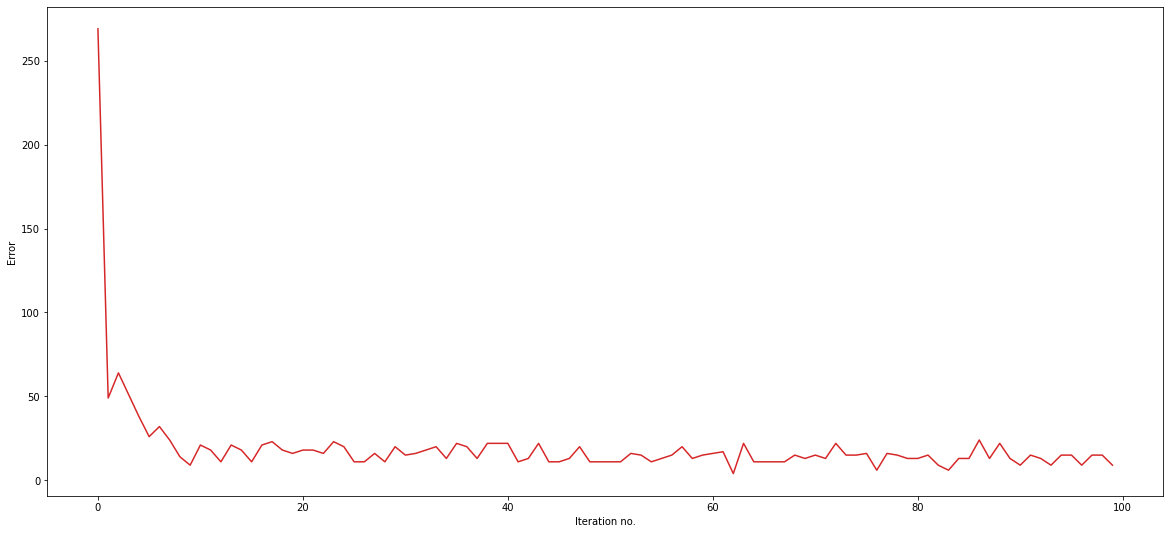

In [18]:
p.error_iteration_curve()

# Convergence Video

In [20]:
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


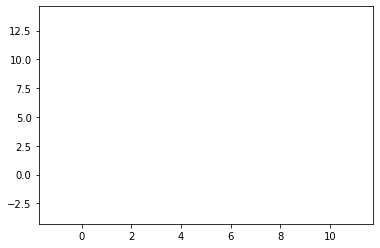

In [21]:
from celluloid import Camera
from IPython.display import HTML

w0, w1 = p.decision_boundary()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

        
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])     
camera = Camera(fig)
for i in range(len(w0)):
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
    ax.plot(w0[i],w1[i], 'k')
    camera.snap() 
animation = camera.animate()
HTML(animation.to_jshtml())

# Confusion Matrix

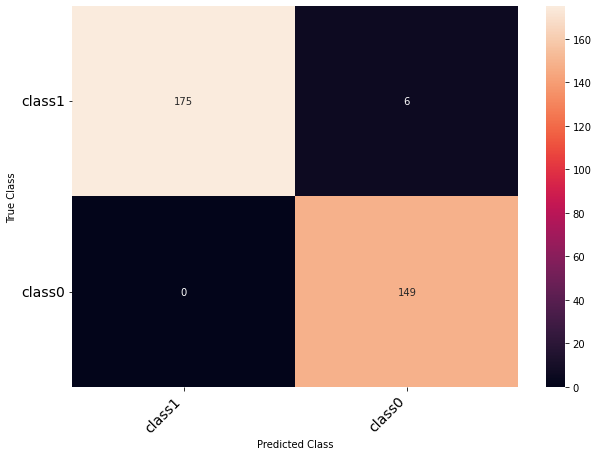

In [22]:
cm_plot_labels = ['class1','class0']
print_confusion_matrix(cm,cm_plot_labels)

In [25]:
True_Positive = cm[0][0]
True_Negative = cm[1][1]
False_Positive = cm[1][0]
False_negative = cm[0][1]

# calculate prediction

In [26]:
recall = True_Positive/(True_Positive + False_negative)
print('Recall: %.3f' % recall)

Recall: 0.967


In [27]:
precision = True_Positive / (True_Positive + False_Positive)
print('Precision: %.3f' % precision)


Precision: 1.000


In [29]:
score = (2 * precision * recall) / (precision + recall)
print('F-Measure: %.3f' % score)

F-Measure: 0.983
